## Isochrone Fitting for Quinn's Photometry

In [2]:
import numpy as np
import pandas as pd
import astropy.io.fits as pf
from astropy.table import Table
import matplotlib.pyplot as plt
import photutils as ph
import astropy.units as u
import astropy.constants as c
import glob
import os

In [ ]:
# read in quinn's photometry

photomet = glob.glob('/Users/f006zcq/Desktop/Dartmouth/SP25/A118/A118-Assign3/data/photometry/*.csv')


In [29]:
photomet

['/Users/f006zcq/Desktop/Dartmouth/SP25/A118/A118-Assign3/data/photometry/coma_berenices_phot.csv',
 '/Users/f006zcq/Desktop/Dartmouth/SP25/A118/A118-Assign3/data/photometry/bootes_err.csv',
 '/Users/f006zcq/Desktop/Dartmouth/SP25/A118/A118-Assign3/data/photometry/leo_err.csv',
 '/Users/f006zcq/Desktop/Dartmouth/SP25/A118/A118-Assign3/data/photometry/leo_phot.csv',
 '/Users/f006zcq/Desktop/Dartmouth/SP25/A118/A118-Assign3/data/photometry/hercules_err.csv',
 '/Users/f006zcq/Desktop/Dartmouth/SP25/A118/A118-Assign3/data/photometry/canes_venatici_phot.csv',
 '/Users/f006zcq/Desktop/Dartmouth/SP25/A118/A118-Assign3/data/photometry/ursa_major_err.csv',
 '/Users/f006zcq/Desktop/Dartmouth/SP25/A118/A118-Assign3/data/photometry/ursa_major_phot.csv',
 '/Users/f006zcq/Desktop/Dartmouth/SP25/A118/A118-Assign3/data/photometry/coma_berenices_err.csv',
 '/Users/f006zcq/Desktop/Dartmouth/SP25/A118/A118-Assign3/data/photometry/bootes_phot.csv',
 '/Users/f006zcq/Desktop/Dartmouth/SP25/A118/A118-Assign3

In [34]:
photom = {}
photom_err = {}
for i,file in enumerate(photomet):
    if 'err' in file:
        dwarf = os.path.splitext(os.path.basename(file))[0][:-4]
        photom_err[dwarf] = pd.read_csv(file)
    else:
        dwarf = os.path.splitext(os.path.basename(file))[0][:-5]
        photom[dwarf] = pd.read_csv(file)

In [114]:
def read_dsep(filename, dm):

    dsep_txt = np.genfromtxt(filename, dtype=float, comments='#', unpack=True)
    dsep_g = dsep_txt[6]
    dsep_r = dsep_txt[7]

    dsep = pd.DataFrame({'g':dsep_g, 'r':dsep_r})
    dsep['gr'] = dsep['g'] - dsep['r']
    dsep['y'] = dsep['r'] + dm

    return dsep

In [115]:
5*np.log10(0.1e6) - 5

20.0

In [165]:
isochrones = {}

isos = glob.glob('/Users/f006zcq/Desktop/Dartmouth/SP25/A118/A118-Assign3/data/isochrones/DSEP/10-12Gyr/*.iso')

for i,iso in enumerate(isos):
    file = os.path.splitext(os.path.basename(iso))[0]
    if '10' not in file and 'tmp' not in file:
        print(file)
        continue
    for dmod in np.arange(15,25):
        dseps = read_dsep(iso,dmod)
        isochrones[file+str(dmod)]=dseps

11gyrMP
12gyrMP


In [166]:
isochrones.keys()

dict_keys(['tmp174872568615', 'tmp174872568616', 'tmp174872568617', 'tmp174872568618', 'tmp174872568619', 'tmp174872568620', 'tmp174872568621', 'tmp174872568622', 'tmp174872568623', 'tmp174872568624', 'tmp174872547915', 'tmp174872547916', 'tmp174872547917', 'tmp174872547918', 'tmp174872547919', 'tmp174872547920', 'tmp174872547921', 'tmp174872547922', 'tmp174872547923', 'tmp174872547924', 'tmp174872552215', 'tmp174872552216', 'tmp174872552217', 'tmp174872552218', 'tmp174872552219', 'tmp174872552220', 'tmp174872552221', 'tmp174872552222', 'tmp174872552223', 'tmp174872552224', '10gyrMP15', '10gyrMP16', '10gyrMP17', '10gyrMP18', '10gyrMP19', '10gyrMP20', '10gyrMP21', '10gyrMP22', '10gyrMP23', '10gyrMP24', 'tmp174872469415', 'tmp174872469416', 'tmp174872469417', 'tmp174872469418', 'tmp174872469419', 'tmp174872469420', 'tmp174872469421', 'tmp174872469422', 'tmp174872469423', 'tmp174872469424', 'tmp174872542815', 'tmp174872542816', 'tmp174872542817', 'tmp174872542818', 'tmp174872542819', 'tmp

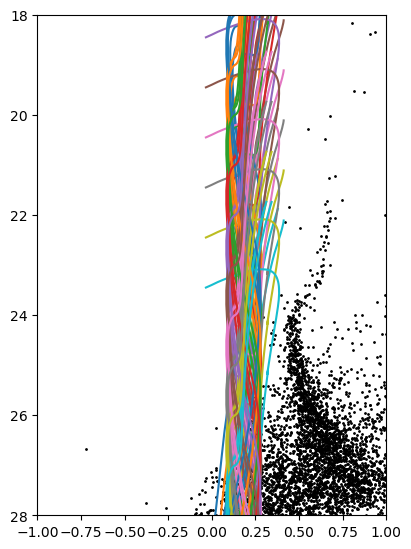

In [167]:
plt.figure(figsize=(4.5,6.5))

for iso in isochrones.keys():
    plt.plot(isochrones[iso]['gr'],isochrones[iso]['y'])


plt.scatter(photom['leo']['color'],photom['leo']['f814w'],1,color='k')
plt.xlim(-1,1)
plt.ylim(18,28)
plt.gca().invert_yaxis()
